## data exploration 
### origin data

In [100]:
import pandas as pd 
train = pd.read_csv(r"/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_11_24.csv", index_col=0)
train.head()
origin = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-2.0.0-chexpert.csv", index_col=0)

In [101]:
import pandas as pd
import numpy as np

# 假设你有一个名为df的DataFrame，你可以根据实际情况替换它
# df = pd.read_csv('your_data.csv')

# 循环遍历DataFrame的每一列，查看唯一值
for column in origin.columns:
    if column == "study_id":
      print(">")
      continue
    unique_values = origin[column].unique()
    value_count = origin[column].value_counts()
    print(f'列 {column} 的唯一值:')
    print(unique_values)
    print(value_count)
    # print("\n")
    
print("\n")
# for column in train.columns:
#     unique_values = train[column].unique()
#     print(f'列 {column} 的唯一值:')
#     print(unique_values)
#     # print("\n")
nan_rows = origin[origin["No Finding"].isna()]
print(nan_rows.index)
nan_index = nan_rows.index
    

>
列 Atelectasis 的唯一值:
[nan -1.  1.  0.]
Atelectasis
 1.0    45808
-1.0    10327
 0.0     1531
Name: count, dtype: int64
列 Cardiomegaly 的唯一值:
[nan  0.  1. -1.]
Cardiomegaly
 1.0    44845
 0.0    15911
-1.0     6043
Name: count, dtype: int64
列 Consolidation 的唯一值:
[nan  1. -1.  0.]
Consolidation
 1.0    10778
 0.0     7967
-1.0     4331
Name: count, dtype: int64
列 Edema 的唯一值:
[nan -1.  0.  1.]
Edema
 1.0    27018
 0.0    25641
-1.0    13174
Name: count, dtype: int64
列 Enlarged Cardiomediastinum 的唯一值:
[nan  1.  0. -1.]
Enlarged Cardiomediastinum
-1.0    9375
 1.0    7179
 0.0    5283
Name: count, dtype: int64
列 Fracture 的唯一值:
[nan  1. -1.  0.]
Fracture
 1.0    4390
 0.0     886
-1.0     555
Name: count, dtype: int64
列 Lung Lesion 的唯一值:
[nan  1.  0. -1.]
Lung Lesion
 1.0    6284
-1.0    1141
 0.0     862
Name: count, dtype: int64
列 Lung Opacity 的唯一值:
[nan -1.  1.  0.]
Lung Opacity
 1.0    51525
-1.0     3831
 0.0     3069
Name: count, dtype: int64
列 No Finding 的唯一值:
[ 1. nan]
No Finding
1.0

In [102]:
test= pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_12_1.csv",index_col=0)
print(test.columns)

train= pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_train_12_1.csv",index_col=0)
print(train.columns)

Index(['img_path', 'train_label', 'file_path', 'split',
       'BiomedClip_img_tensor_path', 'Clip_img_tensor_path'],
      dtype='object')
Index(['label', 'img_path', 'train_label', 'file_path', 'split',
       'Biomed_img_tensor_path', 'Clip_img_tensor_path',
       'BiomedClip_img_tensor_path'],
      dtype='object')


# update No finding and support machine

In [103]:
origin = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-2.0.0-chexpert.csv", index_col=0)
print(origin.head())

print(len(origin))

            study_id  Atelectasis  Cardiomegaly  Consolidation  Edema  \
subject_id                                                              
10000032    50414267          NaN           NaN            NaN    NaN   
10000032    53189527          NaN           NaN            NaN    NaN   
10000032    53911762          NaN           NaN            NaN    NaN   
10000032    56699142          NaN           NaN            NaN    NaN   
10000764    57375967          NaN           NaN            1.0    NaN   

            Enlarged Cardiomediastinum  Fracture  Lung Lesion  Lung Opacity  \
subject_id                                                                    
10000032                           NaN       NaN          NaN           NaN   
10000032                           NaN       NaN          NaN           NaN   
10000032                           NaN       NaN          NaN           NaN   
10000032                           NaN       NaN          NaN           NaN   
10000764      

In [104]:
origin.columns

Index(['study_id', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
       'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
       'Pneumothorax', 'Support Devices'],
      dtype='object')

In [105]:
print(origin['Support Devices'].unique())
SD = origin['Support Devices']
print(SD.unique())

[nan  1.  0. -1.]
[nan  1.  0. -1.]


### support devices

In [106]:
import pandas as pd

sd_dict = {}

# 假设你想查找名为'column_name'的列中包含NaN的行
column_name = 'Support Devices'

# 使用 pd.isna() 方法找到包含 NaN 的行
SD_nan_rows = origin[origin[column_name].apply(pd.isna)]
SD_postive_rows = origin[origin[column_name]==1]
SD_negative_rows = origin[origin[column_name]==0]
SD_uncertain_rows = origin[origin[column_name]==-1]
# 打印结果
print(f'列 {column_name} 中包含 NaN 的行:')
# print(SD_nan_rows.index)
sd_dict["sd_nan"] = SD_nan_rows.study_id.values
sd_dict["sd_p"] = SD_postive_rows.study_id.values
sd_dict["sd_n"] = SD_negative_rows.study_id.values
sd_dict["sd_u"] = SD_uncertain_rows.study_id.values
print(set(sd_dict['sd_nan']).intersection(set(sd_dict["sd_n"])))
print(len(set(sd_dict['sd_nan'])))
print(len(set(sd_dict["sd_p"])))
print(sd_dict["sd_nan"])


列 Support Devices 中包含 NaN 的行:
set()
157546
66558
[50414267 53189527 53911762 ... 57132437 55368167 58971208]


### get 14 labels

In [107]:
import sys
sys.path.append("..")
import constants 
def generate_label(row):
    label_dic = {}
    study_id = -1
    for disease in constants.CHEXPERT_LABELS:
        label_dic[disease] = constants.UNCERTAIN_CLASS
    for column_name, value in row.items():
        if column_name == "study_id": 
          study_id = int(value)
          continue
        # if column_name == "No Finding" and value == constants.POSITIVE:
        #     label_dic[column_name] = constants.POSITIVE_CLASS
        #     label_dic['study_id'] = study_id
        #     # return label_dic
        if value == constants.POSITIVE:
            label_dic[column_name] = constants.POSITIVE_CLASS
            if column_name != "No Finding":
              label_dic["No Finding"] = constants.NEGATIVE_CLASS
        elif value == constants.NEGATIVE:
            label_dic[column_name] = constants.NEGATIVE_CLASS
            if column_name != "No Finding":
              label_dic["No Finding"] = constants.NEGATIVE_CLASS
        
    label_dic['study_id'] = study_id
    return  label_dic

def image_label_preprocess(self, df):
### 按照病人进行排列, 返回的df包含两列： study_id, label
    df = df[["study_id"] + constants.CHEXPERT_LABELS]
    df['label'] = df.apply(self.generate_label, axis=1)
    return df[["study_id", "label"]]

In [108]:
import pandas as pd
a = origin.apply(generate_label,  axis=1)
print(a)
print(a.values)

subject_id
10000032    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
10000032    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
10000032    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
10000032    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
10000764    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
                                  ...                        
19999442    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
19999733    {'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...
19999987    {'Atelectasis': 0, 'Cardiomegaly': 2, 'Consoli...
19999987    {'Atelectasis': 0, 'Cardiomegaly': 2, 'Consoli...
19999987    {'Atelectasis': 0, 'Cardiomegaly': 2, 'Consoli...
Length: 227827, dtype: object
[{'Atelectasis': 2, 'Cardiomegaly': 2, 'Consolidation': 2, 'Edema': 2, 'Enlarged Cardiomediastinum': 2, 'Fracture': 2, 'Lung Lesion': 2, 'Lung Opacity': 2, 'No Finding': 0, 'Pleural Effusion': 2, 'Pleural Other': 2, 'Pneumonia': 2, 'Pneumothorax': 2, 'Support Devices': 2, 'stu

In [109]:
def generate(a):
  values_list = [value for key, value in a.items() if key != 'study_id']
  return {a['study_id']: values_list}


# print(values_list)

final_out = []
for i in a:
  tem = generate(i)
  final_out.append(tem)
print(len(final_out))

227827


In [111]:
NF_P = []
NF_N = []
NF_U = []

for i in a:
  if  (i["No Finding"] == 0):
    NF_P.append(i["study_id"])
  elif (i["No Finding"] == 1):
    NF_N.append(i["study_id"])
  elif (i["No Finding"] == 2):
    NF_U.append(i["study_id"])
    
    
print(set(NF_N).intersection(NF_P))
print(set(NF_U).intersection(NF_P))
print(constants.GREEN+"there is no intersection between each labels"+constants.RESET)

set()
set()
there is no intersection between each labels


In [112]:
# print(NF_P)
# print(NF_U)
# print(NF_N)

print("p: ", len(NF_P))
print("u: ", len(NF_U))
print("N: ",len(NF_N))

p:  53108
u:  5830
N:  168889


In [113]:
57321224 in NF_U

True

### replace train/test datasets' labels

In [114]:
import pandas as pd

train =  pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_train_12_1.csv", )
test = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_12_1.csv",)
print(f"the len of train: {len(train)}")
print(f"the len of test: {len(test)}")

the len of train: 109859
the len of test: 1175


In [115]:
print(f"train columns: \n{train.columns}")
print(f"test columns: \n{test.columns}")

train columns: 
Index(['study_id', 'label', 'img_path', 'train_label', 'file_path', 'split',
       'Biomed_img_tensor_path', 'Clip_img_tensor_path',
       'BiomedClip_img_tensor_path'],
      dtype='object')
test columns: 
Index(['label', 'img_path', 'train_label', 'file_path', 'split',
       'BiomedClip_img_tensor_path', 'Clip_img_tensor_path'],
      dtype='object')


#### update train 14 labels

In [116]:
train_14_labels = []
train_studyid = train.study_id

final_out
combined_dict = {}

# Iterate through the list and update the combined dictionary
for d in final_out:
    combined_dict.update(d)

# print(combined_dict)
for id in train_studyid:
  train_14_labels.append(combined_dict[id])

In [117]:
print (len(train_14_labels) == len(train))
train.head(1)


True


,study_id,label,img_path,train_label,file_path,split,Biomed_img_tensor_path,Clip_img_tensor_path,BiomedClip_img_tensor_path
0,50414267,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,train,D:/project_x_ray_CLIP/data/physionet.org/files...,/public_bme/data/lds/p10/p10000032/s50414267/0...,/public_bme/data/lds/p10/p10000032/s50414267/0...


In [ ]:
train["train_14_labels"] = train_14_labels
train.head(100)

##### generate train_labels14 which contains training sample labels for 14 indicators, <font color=carmine>in train_14_labels</font> column

In [ ]:
train.to_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_train_12_16_labels14.csv")
train14 = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_train_12_16_labels14.csv", index_col=0)
train14

#### update testing 14 labels

In [120]:
print(test.file_path[0])
test.head()

D:/project_x_ray_CLIP/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10//p10032725/s50331901//687754ce-7420bfd3-0a19911f-a27a3916-9019cd53.jpg


,label,img_path,train_label,file_path,split,BiomedClip_img_tensor_path,Clip_img_tensor_path
0,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10032725/s50331901/6...,/public_bme/data/lds/p10/p10032725/s50331901/6...
1,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10032725/s55504914/f...,/public_bme/data/lds/p10/p10032725/s55504914/f...
2,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10046166/s50051329/4...,/public_bme/data/lds/p10/p10046166/s50051329/4...
3,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10046166/s50051329/a...,/public_bme/data/lds/p10/p10046166/s50051329/a...
4,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10046166/s51738740/3...,/public_bme/data/lds/p10/p10046166/s51738740/3...


In [121]:
from pathlib import Path
path = Path (test.file_path[0])
dictectory = path.parent
print(f"file path: {path}")
print(f"dict path: {dictectory}, study: {dictectory.name}")
print(f"file name: {path.name}")
print(f"extension: {path.suffix}")
study_id_from_file_path = []

def extract_sid(filepath):
  path = Path(filepath)
  sid = path.parent.name
  id = -1
  if "s" not in sid:
    raise ValueError(f"something wrong in sid {sid}")
  if sid[0] == "s":
    id = sid[1:]
  else:
    raise ValueError(f"something wroing in id {sid}")
  return id

for i in test.file_path:
  study_id_from_file_path.append(extract_sid(i)) 
print(study_id_from_file_path)
print(f"the len of study_id_from_file_path: {len(study_id_from_file_path)}")
  

file path: D:/project_x_ray_CLIP/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10032725/s50331901/687754ce-7420bfd3-0a19911f-a27a3916-9019cd53.jpg
dict path: D:/project_x_ray_CLIP/data/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10032725/s50331901, study: s50331901
file name: 687754ce-7420bfd3-0a19911f-a27a3916-9019cd53.jpg
extension: .jpg
['50331901', '55504914', '50051329', '50051329', '51738740', '51738740', '51738740', '53492798', '53492798', '53492798', '56173345', '57379357', '57379357', '57977208', '52835225', '50042142', '50214117', '50239281', '51051449', '51051449', '51513702', '51623828', '51715880', '51779078', '51779078', '52199665', '53021891', '53368667', '53452091', '53883066', '54103072', '54137212', '54558182', '54571214', '54658698', '54934220', '54934220', '55430988', '55430988', '55785509', '55809473', '56063579', '57765703', '57873452', '57873452', '57976739', '58011676', '58267855', '58694539', '59301985', '53183707', '53183707', '53356050', '533

In [122]:
test_14_lables = []
combined_dict = {}

# Iterate through the list and update the combined dictionary
for d in final_out:
    combined_dict.update(d)

for sid in study_id_from_file_path:
  try:
    test_14_lables.append(combined_dict[int(sid)])
  except Exception as e:
    print(sid, e)
  
print(f"the len of test_14_labels: {len(test_14_lables)}")

the len of test_14_labels: 1175


##### generate train_labels14 which contains testing sample labels for 14 indicators, <font color=carmine>in test_14_labels</font> column

In [ ]:
test["sid"] = study_id_from_file_path
test["test_14_labels"] = test_14_lables
test.to_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_12_16_labels14.csv")
pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_12_16_labels14.csv", index_col=0).head(100)

In [124]:
from collections import Counter
tem = []
for i  in test_14_lables:
  tem.append(i[8])
print(Counter(tem))

Counter({1: 1013, 0: 131, 2: 31})


## Done, training and testing data is stored in `P10_12_train/test_12_16_labels14.csv` file, and the `train/test_14_labels` contain the classes of 14 labels 
-----

# 14 label distribution 

In [179]:
import inspect, re

def varname(p):
  for line in inspect.getframeinfo(inspect.currentframe().f_back)[3]:
    m = re.search(r'\bvarname\s*\(\s*([A-Za-z_][A-Za-z0-9_]*)\s*\)', line)
    if m:
      return m.group(1)


spam = 42
print(varname(spam))


spam


In [ ]:
test_14_labels = test.test_14_labels
print(test_14_labels)
test_14_labels.info()

test_labels = {}
for i in constants.CHEXPERT_LABELS:
  test_labels[i] = []

numberoflabels = len(constants.CHEXPERT_LABELS)
for sample in test_14_labels:
  for i, label in enumerate(sample):
    test_labels[constants.CHEXPERT_LABELS[i]].append(label)
    
    

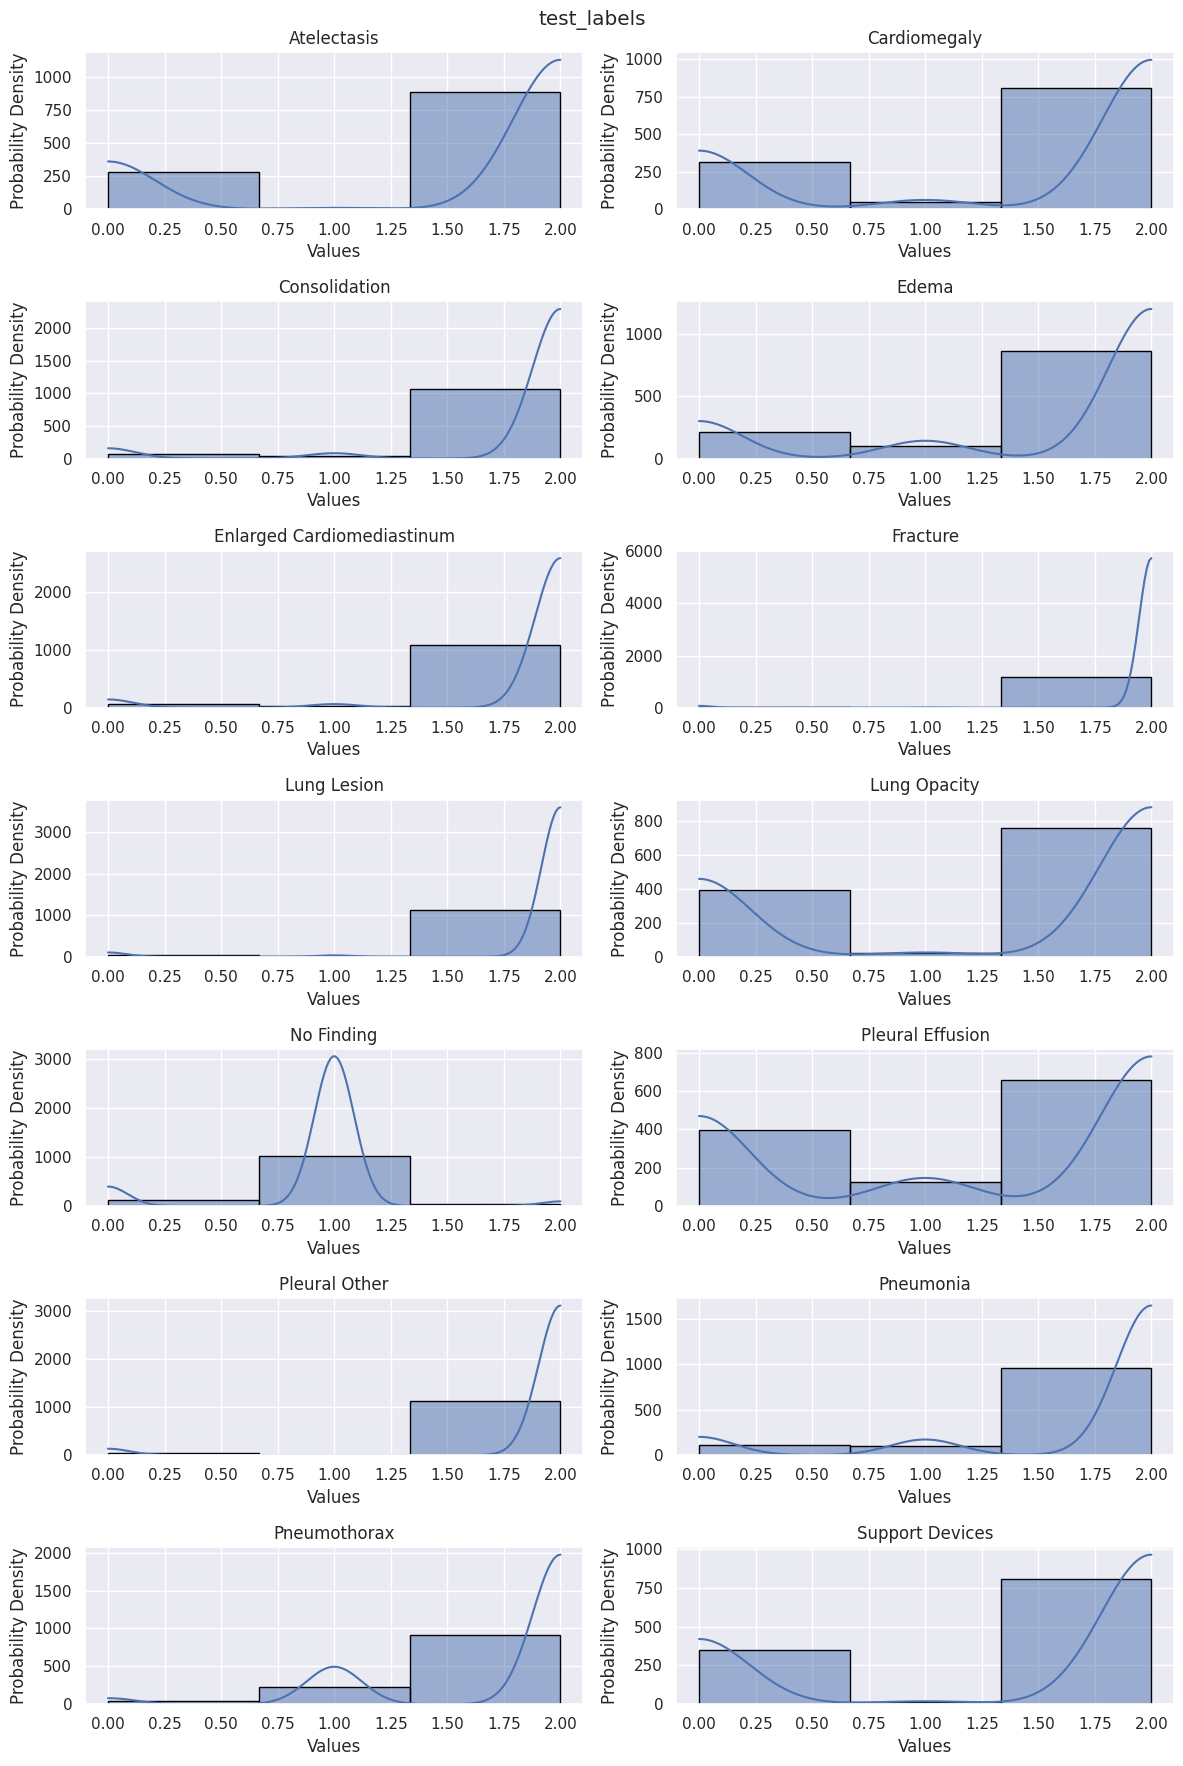

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 18))

# Flatten the 2D array of subplots to simplify indexing
axs = axs.flatten()

# Plot each disease's probability density function using KDE
for i, (disease, values) in enumerate(test_labels.items()):
    row = i // 2
    col = i % 2
    sns.histplot(values, kde=True, ax=axs[i], bins=3, edgecolor='black')
    axs[i].set_title(disease)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Probability Density')
fig.suptitle(varname(test_labels))
# Adjust layout to prevent overlap
plt.tight_layout()


# Show the plot
plt.show()

In [ ]:
import numpy as np
from scipy.stats import entropy

# Sample data (replace this with your actual data)

# Calculate KL divergence between each pair of diseases
diseases = list(test_labels.keys())
kl_heat_test = np.zeros((14, 14))
for i, disease1 in enumerate(diseases):
    for j, disease2 in enumerate(diseases):
        # if i < j:  # Avoid redundant calculations (symmetry)
            # Get probability distributions using kernel density estimate
            _, bins, = np.histogram(
                np.concatenate([test_labels[disease1], test_labels[disease2]]),
                bins=10,
                density=True
            )
            p1, _ = np.histogram(test_labels[disease1], bins=bins, density=True)
            p2, _ = np.histogram(test_labels[disease2], bins=bins, density=True)

            # Handle potential issues with zero probabilities
            p1[p1 == 0] = 1e-10
            p2[p2 == 0] = 1e-10

            # Calculate KL diver
            kl_divergence = entropy(p1, p2)
            print(f"KL Divergence between {disease1} and {disease2}: {kl_divergence}")
            kl_heat_test[i][j] = kl_divergence


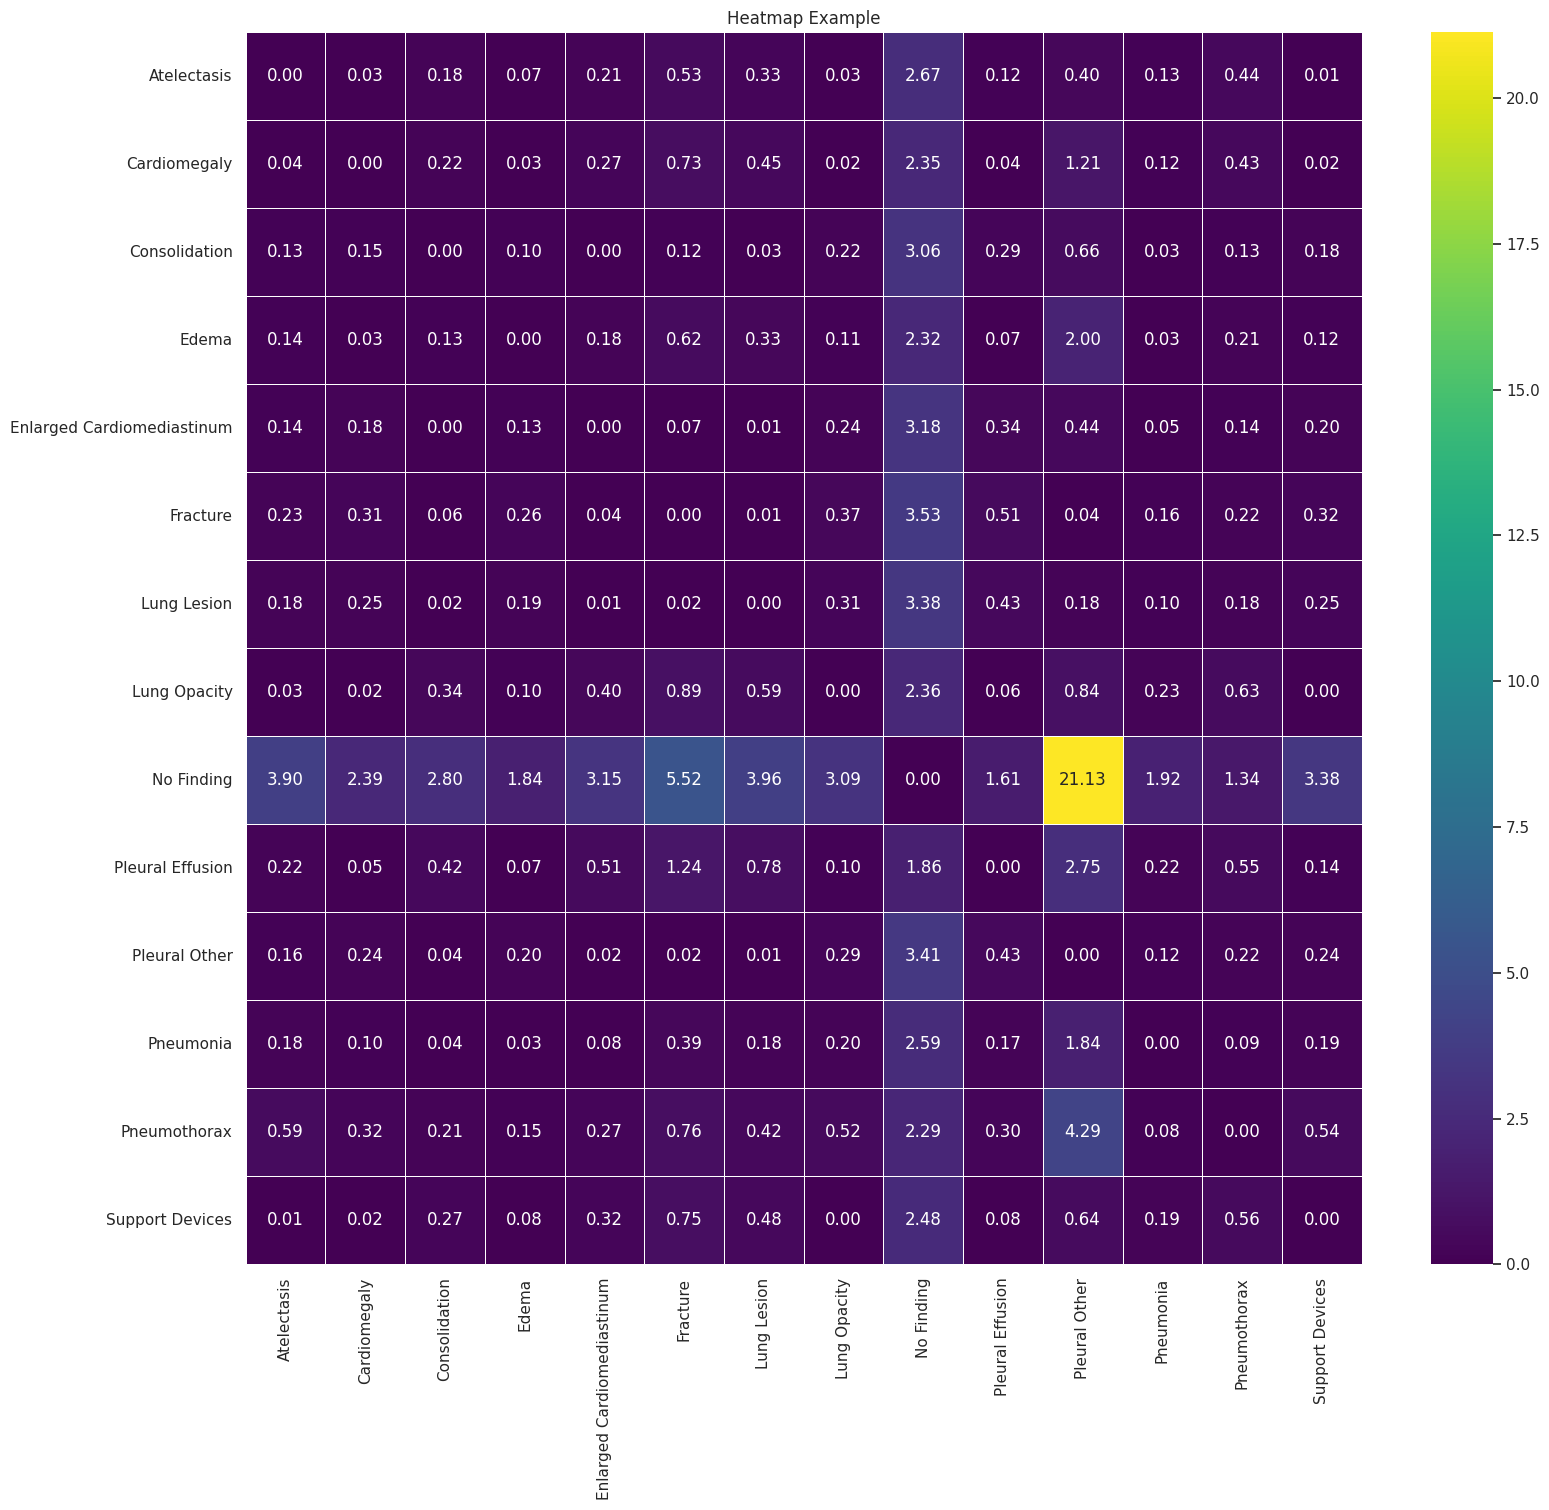

In [230]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 创建一个示例数据，这里假设你有一个二维数组作为矩阵
data = np.random.random((10, 10))
sns.set(rc={'figure.figsize': (18, 16)})
# 使用Seaborn绘制热力图
sns.heatmap(kl_heat_test, cmap='viridis', annot=True, fmt='.2f', linewidths=.5, xticklabels=constants.CHEXPERT_LABELS, yticklabels=constants.CHEXPERT_LABELS)

# 添加标题


plt.title('Heatmap Example')

# 显示图形
plt.show()


**label distribution in training dataset**

In [214]:
train_14_labels = train.train_14_labels
print(train_14_labels)
train_14_labels.info()

train_labels = {}
for i in constants.CHEXPERT_LABELS:
  train_labels[i] = []

numberoflabels = len(constants.CHEXPERT_LABELS)
for sample in train_14_labels:
  for i, label in enumerate(sample):
    train_labels[constants.CHEXPERT_LABELS[i]].append(label)
    
print(len(train_labels["Atelectasis"]))

0         [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
1         [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
2         [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
3         [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
4         [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
                             ...                    
109854    [2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
109855    [2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2]
109856    [2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2]
109857    [2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2]
109858    [2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2]
Name: train_14_labels, Length: 109859, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 109859 entries, 0 to 109858
Series name: train_14_labels
Non-Null Count   Dtype 
--------------   ----- 
109859 non-null  object
dtypes: object(1)
memory usage: 858.4+ KB
109859


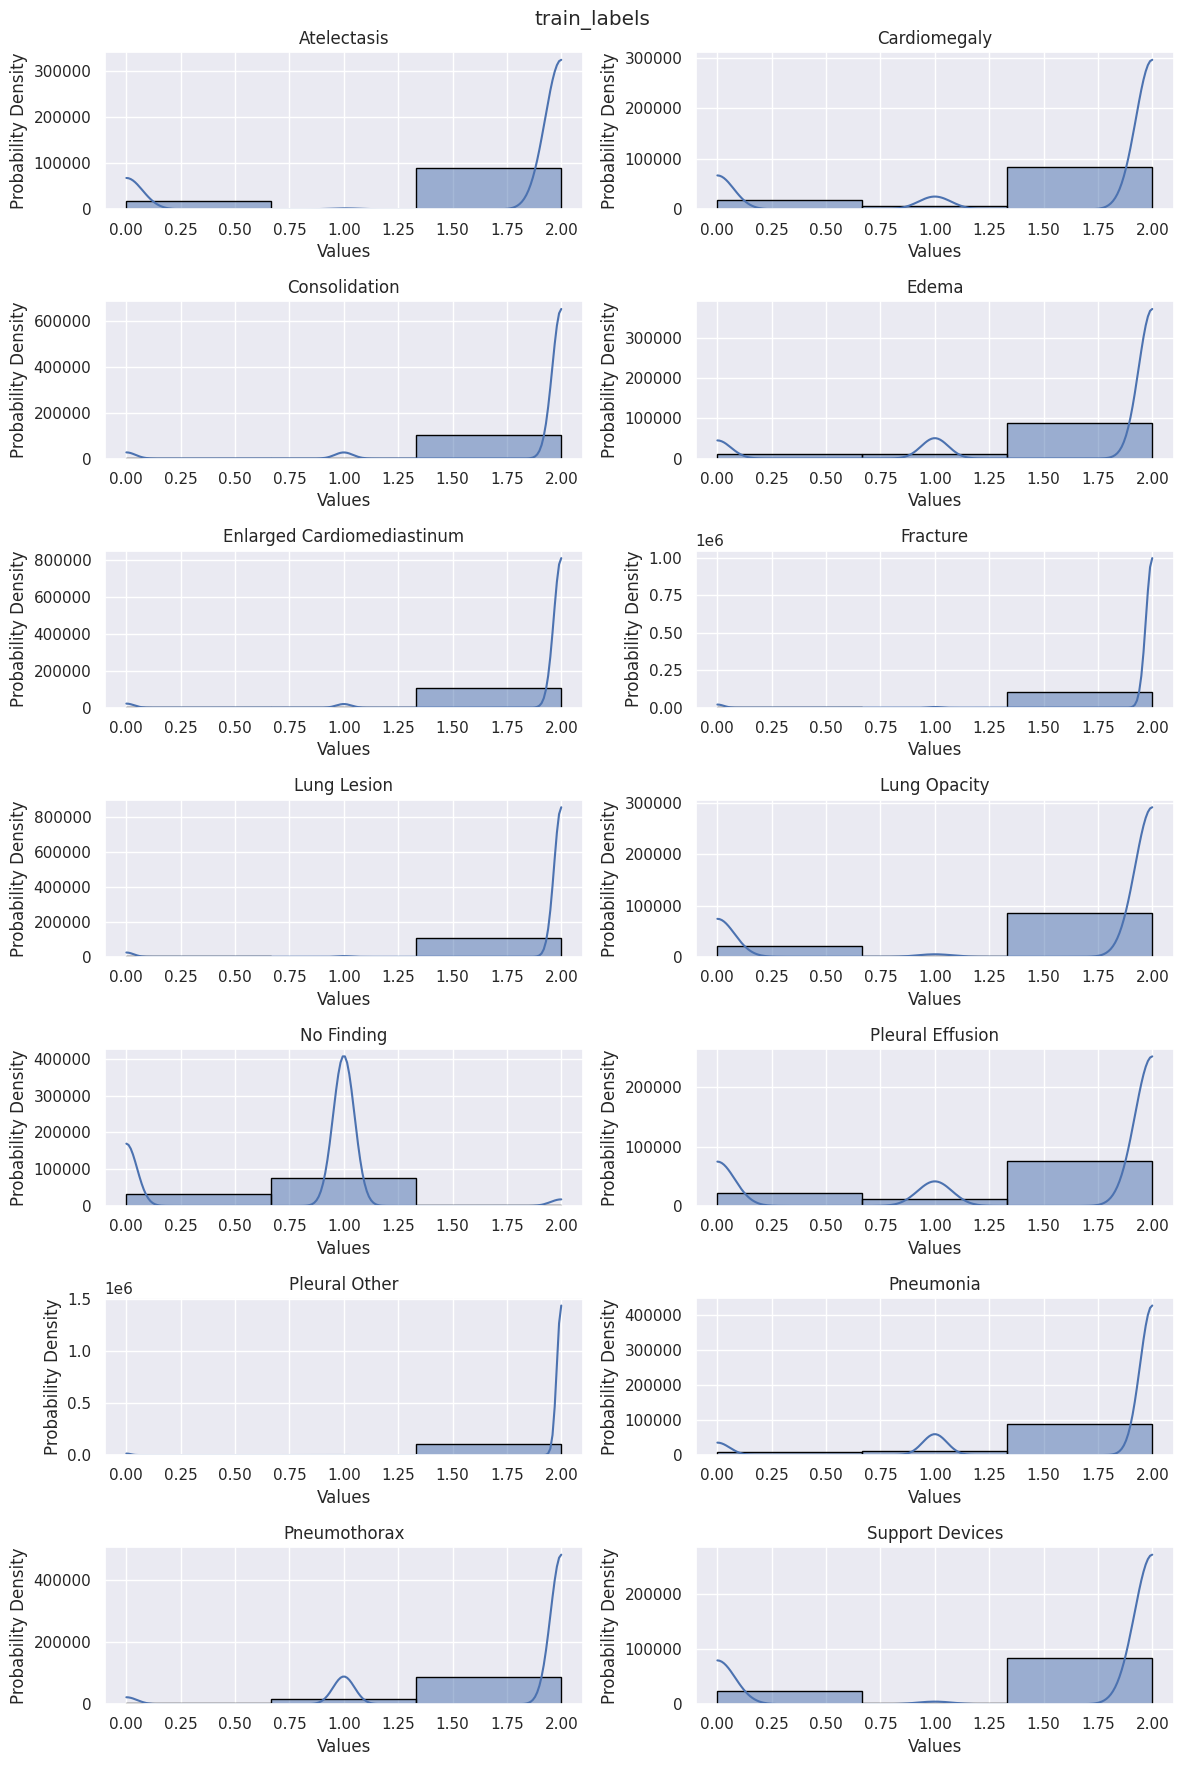

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 18))

# Flatten the 2D array of subplots to simplify indexing
axs = axs.flatten()

# Plot each disease's probability density function using KDE
for i, (disease, values) in enumerate(train_labels.items()):
    row = i // 2
    col = i % 2
    sns.histplot(values, kde=True, ax=axs[i], bins=3, edgecolor='black')
    axs[i].set_title(disease)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Probability Density')
    
fig.suptitle(varname(train_labels))
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import numpy as np
from scipy.stats import entropy

# Sample data (replace this with your actual data)

# Calculate KL divergence between each pair of diseases
diseases = list(train_labels.keys())
kl_heat = np.zeros((14, 14))
for i, disease1 in enumerate(diseases):
    for j, disease2 in enumerate(diseases):
        # if i < j:  # Avoid redundant calculations (symmetry)
            # Get probability distributions using kernel density estimate
            _, bins, = np.histogram(
                np.concatenate([train_labels[disease1], train_labels[disease2]]),
                bins=10,
                density=True
            )
            p1, _ = np.histogram(train_labels[disease1], bins=bins, density=True)
            p2, _ = np.histogram(train_labels[disease2], bins=bins, density=True)

            # Handle potential issues with zero probabilities
            p1[p1 == 0] = 1e-10
            p2[p2 == 0] = 1e-10

            # Calculate KL diver
            kl_divergence = entropy(p1, p2)
            print(f"KL Divergence between {disease1} and {disease2}: {kl_divergence}")
            kl_heat[i][j] = kl_divergence

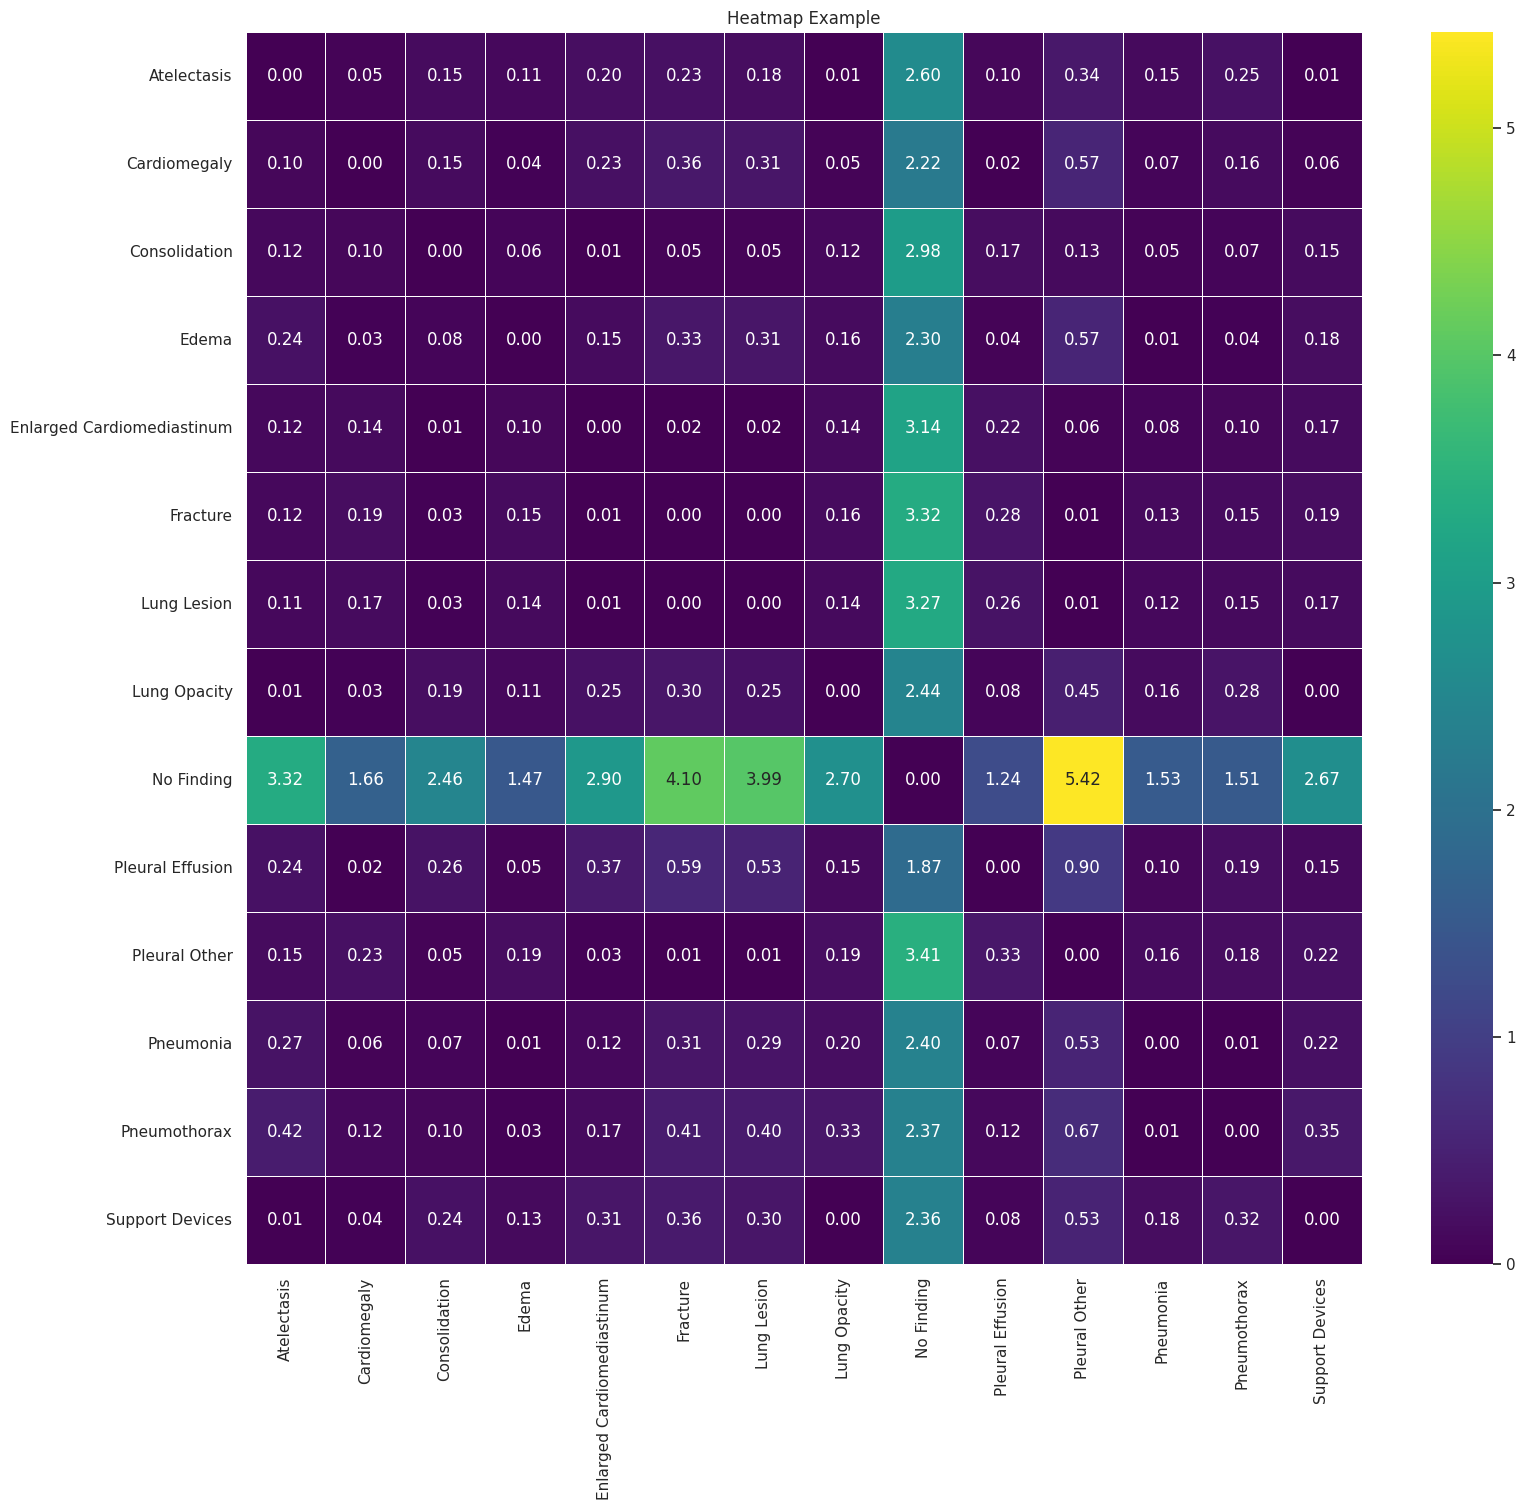

In [217]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 创建一个示例数据，这里假设你有一个二维数组作为矩阵
data = np.random.random((10, 10))
sns.set(rc={'figure.figsize': (18, 16)})
# 使用Seaborn绘制热力图
sns.heatmap(kl_heat, cmap='viridis', annot=True, fmt='.2f', linewidths=.5, xticklabels=constants.CHEXPERT_LABELS, yticklabels=constants.CHEXPERT_LABELS)

# 添加标题


plt.title('Heatmap Example')

# 显示图形
plt.show()

In [218]:
from scipy.stats import pearsonr

matrix1 = [1, 2, 3, 4]
matrix2 = [2, 3, 4, 5]

pearson_corr, _ = pearsonr(matrix1, matrix2)
print(pearson_corr)

matrix1 = set([1, 2, 3, 4])
matrix2 = set([2, 3, 4, 5])

jaccard_similarity = len(matrix1.intersection(matrix2)) / len(matrix1.union(matrix2))
print(jaccard_similarity)

import numpy as np

matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[2, 3], [4, 5]])

frobenius_norm = np.linalg.norm(matrix1 - matrix2)
print(frobenius_norm)


1.0
0.6
2.0


#### measure the similarity between two different KL matric
<font color=yellow>Conclusion: </font> try different metrics, in Consine Simlarity metric, the similarity is <font color=yellow>83%</font>  
<font color=yellow>need more testing data for robust testing</font>

In [220]:
frobenius_norm = np.linalg.norm(kl_heat-kl_heat_test)
print(frobenius_norm)

16.58958738345078


In [224]:
matrix1 = kl_heat 
matrix2 = kl_heat_test
np.trace(np.dot(matrix1.T, matrix2)) / (np.linalg.norm(matrix1) * np.linalg.norm(matrix2))

0.8333041285315954

In [226]:
from scipy.stats import spearmanr
spearmanr(matrix1.flatten(), matrix2.flatten())

SignificanceResult(statistic=0.9433673327035677, pvalue=6.604665653724472e-95)

In [228]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

euclidean_dist = euclidean_distances(matrix1.flatten().reshape(1, -1), matrix2.flatten().reshape(1, -1))[0, 0]
cosine_sim = cosine_similarity(matrix1.flatten().reshape(1, -1), matrix2.flatten().reshape(1, -1))[0, 0]
cosine_sim


0.8333041285315955

In [229]:
from scipy.stats import pearsonr

correlation_coefficient, _ = pearsonr(matrix1.flatten(), matrix2.flatten())
correlation_coefficient

0.803810130934397

----
data exploration in test dataset


In [231]:
import pandas as pd 

data = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_12_16_labels14.csv", index_col=0)

In [232]:
test

,label,img_path,train_label,file_path,split,BiomedClip_img_tensor_path,Clip_img_tensor_path,sid,test_14_labels
0,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10032725/s50331901/6...,/public_bme/data/lds/p10/p10032725/s50331901/6...,50331901,"[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0]"
1,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10032725/s55504914/f...,/public_bme/data/lds/p10/p10032725/s55504914/f...,55504914,"[2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0]"
2,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10046166/s50051329/4...,/public_bme/data/lds/p10/p10046166/s50051329/4...,50051329,"[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]"
3,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10046166/s50051329/a...,/public_bme/data/lds/p10/p10046166/s50051329/a...,50051329,"[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]"
4,"{'Atelectasis': 1, 'Cardiomegaly': 1, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p10/p10046166/s51738740/3...,/public_bme/data/lds/p10/p10046166/s51738740/3...,51738740,"[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]"
...,...,...,...,...,...,...,...,...,...
1170,"{'Atelectasis': 2, 'Cardiomegaly': 0, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p12/p12963531/s59505688/4...,/public_bme/data/lds/p12/p12963531/s59505688/4...,59505688,"[2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2]"
1171,"{'Atelectasis': 2, 'Cardiomegaly': 0, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p12/p12963531/s59505688/5...,/public_bme/data/lds/p12/p12963531/s59505688/5...,59505688,"[2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2]"
1172,"{'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p12/p12966004/s55553875/d...,/public_bme/data/lds/p12/p12966004/s55553875/d...,55553875,"[2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2]"
1173,"{'Atelectasis': 2, 'Cardiomegaly': 2, 'Consoli...",D:/project_x_ray_CLIP/data/physionet.org/files...,"[2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1]",D:/project_x_ray_CLIP/data/physionet.org/files...,test,/public_bme/data/lds/p12/p12966004/s57399078/8...,/public_bme/data/lds/p12/p12966004/s57399078/8...,57399078,"[2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0]"


In [237]:
test.label[0][-3]

' '

In [243]:
other = []
import numpy as np
for i in test.test_14_labels:
  other.append(i[-4])
0 in other

True

In [239]:
a = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-2.0.0-chexpert.csv")
a

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227823,19999733,57132437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227824,19999987,55368167,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227825,19999987,58621812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [244]:
import pandas as pd
split = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-2.0.0-split.csv")

In [245]:
a = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-2.0.0-chexpert.csv")
a

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227823,19999733,57132437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227824,19999987,55368167,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227825,19999987,58621812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [250]:
test = split[split.split=="test"]
test

,dicom_id,study_id,subject_id,split
1461,687754ce-7420bfd3-0a19911f-a27a3916-9019cd53,50331901,10032725,test
1462,fd4126e5-c5485b35-3bbc48fc-acb448fa-fb1b42b7,55504914,10032725,test
1825,427446c1-881f5cce-85191ce1-91a58ba9-0a57d3f5,50051329,10046166,test
1826,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,test
1827,3a8a17fc-3cd357d9-83466363-91dc5a06-a401e5ed,51738740,10046166,test
...,...,...,...,...
376659,313f1d75-23648c34-dd36ecad-5d0f94e8-93a40356,58283482,19991135,test
376660,4d0251eb-cc875c55-fde85f43-3a9d7888-c62772b8,58283482,19991135,test
376661,f6a7a470-9e057a45-d244e0e5-3efe1422-bb946478,58283482,19991135,test
376662,43636aec-98ae2504-18f03cac-4fe8e211-62049c6d,59381316,19991135,test


In [251]:
test.study_id
test = a[a.study_id.isin(list(test.study_id))]

In [252]:
test.describe()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
count,3.269000e+03,3.269000e+03,942.000000,1155.000000,412.000000,1277.000000,419.000000,96.000000,155.000000,1175.000000,568.0,1544.000000,79.000000,953.00000,858.000000,1163.000000
mean,1.520671e+07,5.498367e+07,0.573248,0.650216,0.298544,0.308536,-0.126492,0.885417,0.677419,0.816170,1.0,0.611399,0.594937,-0.01574,0.108392,0.963887
std,2.736833e+06,2.895203e+06,0.806750,0.653406,0.825799,0.816386,0.912822,0.432126,0.673578,0.533617,0.0,0.637375,0.808909,0.84811,0.375628,0.204264
min,1.003272e+07,5.000071e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
25%,1.307850e+07,5.244902e+07,1.000000,0.500000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,-1.00000,0.000000,1.000000
50%,1.513174e+07,5.497383e+07,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.00000,0.000000,1.000000
75%,1.734069e+07,5.746312e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,0.000000,1.000000
max,1.999114e+07,5.999983e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,1.000000


In [254]:
test['Pleural Other'].unique()

array([nan,  1., -1.])

In [264]:
a = pd.read_csv("/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/mimic-cxr-train/P10_12_test_12_16_labels14.csv")
b = a.test_14_labels
c = []
import ast
for i in b:
  c.append(ast.literal_eval(i))
import numpy as np
d = np.array(c)
for i in range(len(d[0])):
  print(set(d[:,i]))

{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
{0, 2}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2}
